This is a notebook for analysing coefficient of extra amenity information

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
#OLS
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LassoLarsIC
import numpy as np
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('rent_clean.csv')



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (39,50,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
housing_model = ols("price_per_sqm ~ apartment + number_of_whole_rooms + number_of_half_rooms + floor + distance_to_danube + quadratic_danube + distance_to_city_centre + quadratic_centre + distance_to_keleti + quadratic_keleti + distance_to_nyugati + quadratic_nyugati + distance_to_deli + quadratic_deli + distance_to_airport + quadratic_airport + distance_to_uni1 + quadratic_uni1 + distance_to_uni5 + quadratic_uni5 + distance_to_uni13 + quadratic_uni13 + distance_to_uni16 + quadratic_uni16", data=data).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)


In [4]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     67.03
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          9.92e-300
Time:                        19:57:24   Log-Likelihood:                -26290.
No. Observations:                9480   AIC:                         5.263e+04
Df Residuals:                    9455   BIC:                         5.281e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [5]:
housing_model = ols("price_per_sqm ~ apartment + number_of_whole_rooms + number_of_half_rooms + floor + distance_to_danube + quadratic_danube + distance_to_city_centre + quadratic_centre + distance_to_keleti + quadratic_keleti + distance_to_nyugati + quadratic_nyugati + distance_to_deli + quadratic_deli + distance_to_airport + quadratic_airport + distance_to_uni1 + quadratic_uni1 + distance_to_uni5 + quadratic_uni5 + distance_to_uni13 + quadratic_uni13 + distance_to_uni16 + quadratic_uni16 + shop_art_music_hobbies + shop_beauty + shop_clothing_shoes_accessories + shop_convenience_shop + shop_department_store + shop_discount_store_charity + shop_food_beverages + shop_health + shop_laundry + shop_mall + shop_stationery_gifts_books_newspapers + shop_supermarket + shop_travel_agency", data=data).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)


In [6]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     40.93
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          9.69e-268
Time:                        19:57:26   Log-Likelihood:                -21841.
No. Observations:                7964   AIC:                         4.376e+04
Df Residuals:                    7926   BIC:                         4.402e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [7]:
housing_model = ols("price_per_sqm ~ apartment + number_of_whole_rooms + number_of_half_rooms + floor + distance_to_danube + quadratic_danube + distance_to_city_centre + quadratic_centre + distance_to_keleti + quadratic_keleti + distance_to_nyugati + quadratic_nyugati + distance_to_deli + quadratic_deli + distance_to_airport + quadratic_airport + distance_to_uni1 + quadratic_uni1 + distance_to_uni5 + quadratic_uni5 + distance_to_uni13 + quadratic_uni13 + distance_to_uni16 + quadratic_uni16 + shop_art_music_hobbies + shop_beauty + shop_clothing_shoes_accessories + shop_convenience_shop + shop_department_store + shop_discount_store_charity + shop_food_beverages + shop_health + shop_laundry + shop_mall + shop_stationery_gifts_books_newspapers + shop_supermarket + shop_travel_agency + metro_station + bus_station", data=data).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)


In [8]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     39.67
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          1.35e-270
Time:                        19:57:27   Log-Likelihood:                -20541.
No. Observations:                7523   AIC:                         4.116e+04
Df Residuals:                    7483   BIC:                         4.144e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [9]:
housing_model = ols("price_per_sqm ~ apartment + number_of_whole_rooms + number_of_half_rooms + floor + distance_to_danube + quadratic_danube + distance_to_city_centre + quadratic_centre + distance_to_keleti + quadratic_keleti + distance_to_nyugati + quadratic_nyugati + distance_to_deli + quadratic_deli + distance_to_airport + quadratic_airport + distance_to_uni1 + quadratic_uni1 + distance_to_uni5 + quadratic_uni5 + distance_to_uni13 + quadratic_uni13 + distance_to_uni16 + quadratic_uni16 + shop_art_music_hobbies + shop_beauty + shop_clothing_shoes_accessories + shop_convenience_shop + shop_department_store + shop_discount_store_charity + shop_food_beverages + shop_health + shop_laundry + shop_mall + shop_stationery_gifts_books_newspapers + shop_supermarket + shop_travel_agency + metro_station + bus_station + tourism_apartment + tourism_attraction + tourism_gallery + tourism_guest_house + tourism_hostel + tourism_hotel + tourism_information + tourism_motel + tourism_museum ", data=data).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)


In [10]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     30.35
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          2.57e-247
Time:                        19:57:28   Log-Likelihood:                -19747.
No. Observations:                7283   AIC:                         3.959e+04
Df Residuals:                    7234   BIC:                         3.993e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [11]:
housing_model = ols("price_per_sqm ~ apartment + number_of_whole_rooms + number_of_half_rooms + floor + distance_to_danube + quadratic_danube + distance_to_city_centre + quadratic_centre + distance_to_keleti + quadratic_keleti + distance_to_nyugati + quadratic_nyugati + distance_to_deli + quadratic_deli + distance_to_airport + quadratic_airport + distance_to_uni1 + quadratic_uni1 + distance_to_uni5 + quadratic_uni5 + distance_to_uni13 + quadratic_uni13 + distance_to_uni16 + quadratic_uni16 + shop_art_music_hobbies + shop_beauty + shop_clothing_shoes_accessories + shop_convenience_shop + shop_department_store + shop_discount_store_charity + shop_food_beverages + shop_health + shop_laundry + shop_mall + shop_stationery_gifts_books_newspapers + shop_supermarket + shop_travel_agency + metro_station + bus_station + tourism_apartment + tourism_attraction + tourism_gallery + tourism_guest_house + tourism_hostel + tourism_hotel + tourism_information + tourism_motel + tourism_museum + amenity_sustenance + amenity_school + amenity_education + amenity_financial + amenity_healthcare + amenity_arts + amenity_entertainment + amenity_religion + amenity_police + amenity_government + amenity_vending_machine + amenity_parking + amenity_recycling", data=data).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)


In [12]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     22.27
Date:                Fri, 19 Apr 2019   Prob (F-statistic):          2.75e-219
Time:                        19:57:29   Log-Likelihood:                -17926.
No. Observations:                6605   AIC:                         3.598e+04
Df Residuals:                    6543   BIC:                         3.640e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [13]:
housing_model = ols("price_per_sqm ~ apartment + number_of_whole_rooms + number_of_half_rooms + floor + distance_to_danube + quadratic_danube + distance_to_city_centre + quadratic_centre + distance_to_keleti + quadratic_keleti + distance_to_nyugati + quadratic_nyugati + distance_to_deli + quadratic_deli + distance_to_airport + quadratic_airport + distance_to_uni1 + quadratic_uni1 + distance_to_uni5 + quadratic_uni5 + distance_to_uni13 + quadratic_uni13 + distance_to_uni16 + quadratic_uni16 + shop_art_music_hobbies + shop_beauty + shop_clothing_shoes_accessories + shop_convenience_shop + shop_department_store + shop_discount_store_charity + shop_food_beverages + shop_health + shop_laundry + shop_mall + shop_stationery_gifts_books_newspapers + shop_supermarket + shop_travel_agency + metro_station + bus_station + tourism_apartment + tourism_attraction + tourism_gallery + tourism_guest_house + tourism_hostel + tourism_hotel + tourism_information + tourism_motel + tourism_museum + amenity_sustenance + amenity_school + amenity_education + amenity_financial + amenity_healthcare + amenity_arts + amenity_entertainment + amenity_religion + amenity_police + amenity_government + amenity_vending_machine + amenity_parking + amenity_recycling + leisure_dance + leisure_dog_park + leisure_fitness_centre + leisure_fitness_station + leisure_garden + leisure_nature_reserve + leisure_park + leisure_pitch + leisure_playground + leisure_sports_centre + leisure_stadium + leisure_swimming_pool + leisure_track + leisure_water_park", data=data).fit()

# summarize our model
housing_model_summary = housing_model.summary()

# convert our table to HTML and add colors to headers for explanatory purposes
HTML(
(housing_model_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)


In [14]:
print(housing_model.summary())

                            OLS Regression Results                            
Dep. Variable:          price_per_sqm   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     7.196
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           2.91e-58
Time:                        19:57:31   Log-Likelihood:                -4036.0
No. Observations:                1577   AIC:                             8222.
Df Residuals:                    1502   BIC:                             8624.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

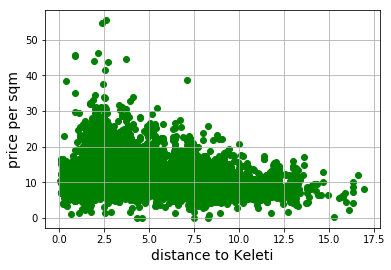

In [15]:
plt.scatter(data['distance_to_keleti'], data['price_per_sqm'], color = 'green')
plt.xlabel('distance to Keleti', fontsize = 14)
plt.ylabel('price per sqm', fontsize = 14)
plt.grid(True)
plt.savefig('keleti_1.png')
plt.show()


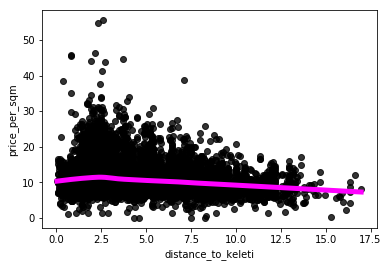

In [16]:
sns.regplot(data['distance_to_keleti'], data['price_per_sqm'], lowess=True, color="black", line_kws={"color":"magenta", "linewidth":5})
plt.savefig('keleti_2.png')


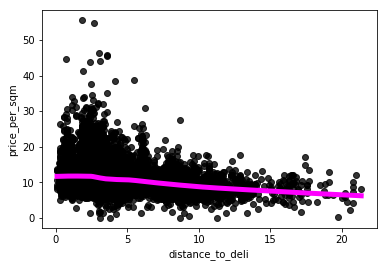

In [17]:
sns.regplot(data['distance_to_deli'], data['price_per_sqm'], lowess=True, color="black", line_kws={"color":"magenta", "linewidth":5})
plt.savefig('deli_1.png')


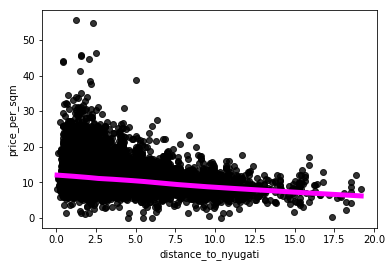

In [18]:
sns.regplot(data['distance_to_nyugati'], data['price_per_sqm'], lowess=True, color="black", line_kws={"color":"magenta", "linewidth":5})
plt.savefig('nyugati_1.png')


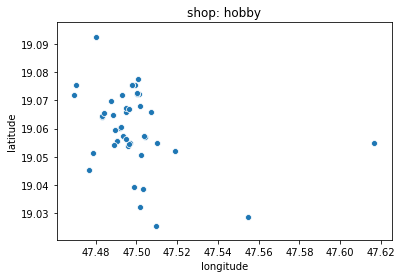

In [19]:
hobby = pd.read_csv('hobby.csv')

sns.scatterplot(x = "longitude", y="latitude", data=hobby).set_title("shop: hobby")
plt.savefig('hobby_1.png')


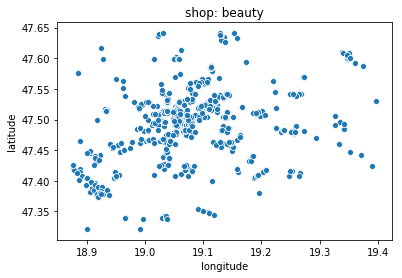

In [20]:
beauty = pd.read_csv('shop_beauty.csv')

sns.scatterplot(x = "longitude", y="latitude", data=beauty).set_title("shop: beauty")
plt.savefig('beauty_1.png')


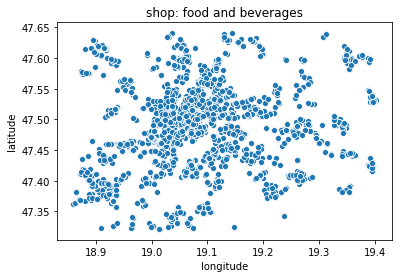

In [21]:
food = pd.read_csv('shop_food.csv')

sns.scatterplot(x = "longitude", y="latitude", data=food).set_title("shop: food and beverages")
plt.savefig('food_1.png')


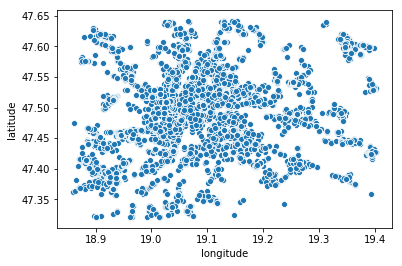

In [22]:
shop = pd.read_csv('shop_clean.csv')

sns.scatterplot(x = "longitude", y="latitude", data=shop)
plt.savefig('shop_1.png')


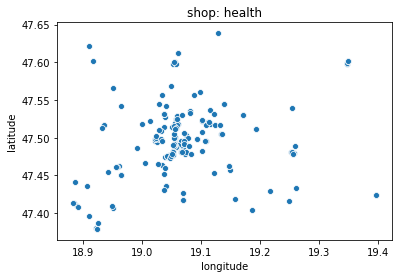

In [23]:
health = pd.read_csv('shop_health.csv')

sns.scatterplot(x = "longitude", y="latitude", data=health).set_title("shop: health")
plt.savefig('health_1.png')


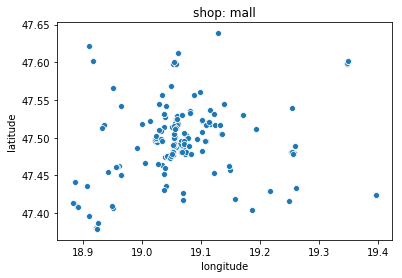

In [24]:
mall = pd.read_csv('shop_mall.csv')

sns.scatterplot(x = "longitude", y="latitude", data=health).set_title("shop: mall")
plt.savefig('mall_1.png')


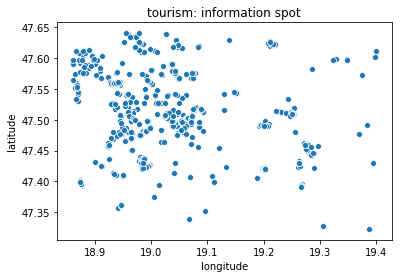

In [25]:
info = pd.read_csv('tourism_information.csv')

sns.scatterplot(x = "longitude", y="latitude", data=info).set_title("tourism: information spot")
plt.savefig('travel_1.png')


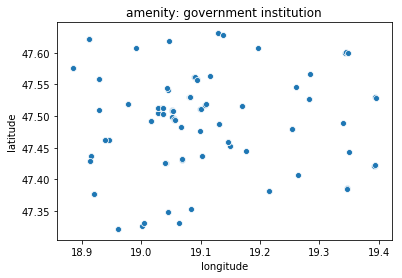

In [26]:
government = pd.read_csv('amenity_government.csv')

sns.scatterplot(x = "longitude", y="latitude", data=government).set_title("amenity: government institution")
plt.savefig('government_1.png')


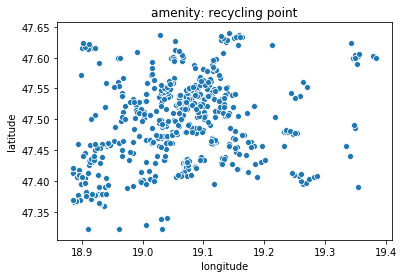

In [27]:
recycle = pd.read_csv('amenity_recycling.csv')

sns.scatterplot(x = "longitude", y="latitude", data=recycle).set_title("amenity: recycling point")
plt.savefig('recycle_1.png')
